In [1]:
import tensorflow as tf
import matplotlib.image as img
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import matplotlib.pyplot as plt
import os
import random
from tensorflow import keras
import cv2
import pathlib
from PIL import Image
from io import BytesIO
import requests

**Load model**

In [2]:
# Download model here: https://drive.google.com/file/d/1yVvK-I3utZY-gMc0IS3P-9lELZC8V58v/view?usp=share_link
#  Load 54 classes model
model54 = tf.keras.models.load_model('/Users/nopparuj/ZSM-00/FoodForThoughts/best_model_54class.hdf5')

2022-11-15 12:09:40.842651: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-15 12:09:40.842996: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



**Food classes label**

In [3]:
food_list = np.sort(['bibimbap','caesar_salad', 'cheesecake','chicken_curry','chicken_wings','chocolate_cake','club_sandwich','crab_cakes','creme_brulee','cup_cakes',\
             'donuts','dumplings','edamame','eggs_benedict','filet_mignon','fish_and_chips','foie_gras','french_fries','fried_rice','frozen_yogurt','garlic_bread',\
             'grilled_cheese_sandwich','grilled_salmon','gyoza','hamburger','hot_and_sour_soup','hot_dog','ice_cream','lasagna','lobster_bisque','macaroni_and_cheese',\
             'macarons','miso_soup','mussels','omelette','onion_rings','oysters','pad_thai','pancakes','panna_cotta','peking_duck','pho','pizza','ramen','steak',\
             'risotto','sashimi','scallops','spaghetti_bolognese','spaghetti_carbonara','sushi','takoyaki','tiramisu','waffles'])

classes = list(food_list)
# print(classes[0])

bibimbap


**Get images and process**

In [8]:
'''If want image from internet'''
def internet_get(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    input = img
    # Resize img to proper for feed model.
    img = img.resize((299,299))
    # Convert img to numpy array,rescale it,expand dims and check vertically.
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x / 255.0 
    x = np.expand_dims(x,axis = 0)
    img_tensor = np.vstack([x])
    return input,img_tensor

'''If want image from local'''
def local_get(path):
    img = Image.open(path)
    input = img
    # Resize img to proper for feed model.
    img = img.resize((299,299))
    # Convert img to numpy array,rescale it,expand dims and check vertically.
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x / 255.0 
    x = np.expand_dims(x,axis = 0)
    img_tensor = np.vstack([x])
    return input, img_tensor

def predict_result(path):
    original_img, img_tensor = local_get(path)
    pred = model54.predict(img_tensor)
    classes = list(food_list)
    class_predicted = classes[np.argmax(pred)]
    percent = np.max(pred)

    return percent, class_predicted


**Plot testing images and prediction results**

2022-11-15 12:09:44.293277: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-15 12:09:44.721988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 43ms/step


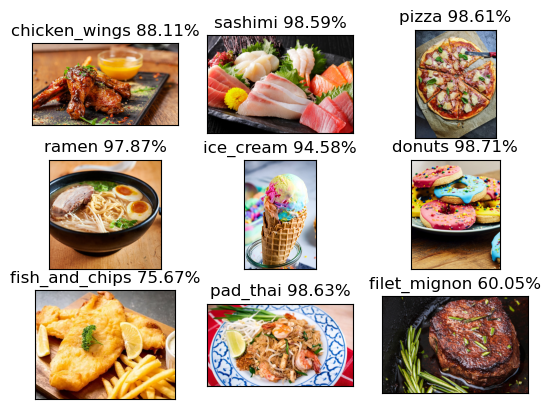

In [5]:
import glob

path = np.sort(glob.glob("/Users/nopparuj/ZSM-00/FoodForThoughts/54test/*.jpg"))

# print(path[0])

for i in range (9):
    plt.subplot(3,3,i+1)
    confidences, labels = predict_result(path[i])
    confidences = (confidences * 100)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Image.open(path[i]))
    plt.title(f"{labels} {confidences:.2f}%")
plt.show()

**Predict food image from internet**

1/1 [==============================] - 0s 198ms/step


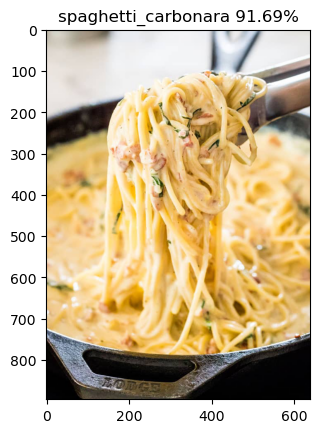

In [9]:
# Paste image url
src = 'https://www.jocooks.com/wp-content/uploads/2012/05/creamy-carbonara-1.jpg'
img_input, img_res = internet_get(src)
pred_res = model54.predict(img_res)
classes = list(food_list)
label = classes[np.argmax(pred_res)]
confident = np.max(pred_res) * 100

# Show internet image
plt.imshow(img_input)
plt.title(f"{label} {confident:.2f}%")
plt.show()
